# Tuning the number of features

In [1]:
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
import numpy as np

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
telco = pd.read_csv('telco.csv')

In [3]:
# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

In [4]:
features = telco.drop(['Churn','Avg_Night_Calls'], axis=1).columns

In [5]:
# Instantiate the classifier
clf = RandomForestClassifier()

In [6]:
# Create feature variable
X = telco[features]

# Create target variable
y = telco['Churn']

In [7]:
# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']})

In [8]:
# Print the optimal parameters
print(grid_search.best_params_)

{'max_features': 'log2'}


# Tuning other hyperparameters

In [9]:
# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print best parameters
print(grid_search.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}


# Randomized search

In [10]:
# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": [randint(1, 11)],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist)

# Fit the model
random_search.fit(X, y)

# Print best parameters
print(random_search.best_params_)

/home/renan/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'max_features': 9, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}


# Visualizing feature importances

In [11]:
# Instantiate the classifier
clf = RandomForestClassifier(max_features= 5, max_depth= None, criterion= 'entropy', bootstrap=True)

clf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_features=5)

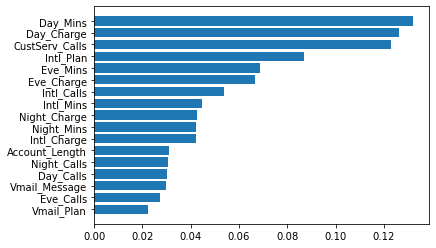

In [12]:
# Calculate feature importances
importances = clf.feature_importances_

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()